In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df = pd.read_excel("../data/final-data-assgn3.xlsx")
df

,Month,FOREIGN EXCHANGE RESERVES,RBI REFERENCE RATE: INR PER USD,FOREIGN TRADE EXPORTS,FOREIGN TRADE IMPORTS
0,2015-01,1995000.000,62.0100,151925.590700,200774.177200
1,2015-02,2040180.000,62.4500,136532.627000,178205.351400
2,2015-03,2100630.000,63.0800,150092.960100,221251.649200
3,2015-04,2146200.000,63.6550,138918.100300,210264.042000
4,2015-05,2210960.000,63.4330,143736.207300,209505.876200
...,...,...,...,...,...
117,2024-10,5887828.146,84.0886,327466.407414,546767.643748
118,2024-11,5735915.000,84.4971,269602.935206,539309.803245
119,2024-12,5546163.130,85.6232,321263.962259,496988.227779
120,2025-01,5443632.914,86.6414,313935.762264,512695.582162


In [3]:
df["Trade Balance"] = df['FOREIGN TRADE EXPORTS'] - df['FOREIGN TRADE IMPORTS']
df

,Month,FOREIGN EXCHANGE RESERVES,RBI REFERENCE RATE: INR PER USD,FOREIGN TRADE EXPORTS,FOREIGN TRADE IMPORTS,Trade Balance
0,2015-01,1995000.000,62.0100,151925.590700,200774.177200,-48848.586500
1,2015-02,2040180.000,62.4500,136532.627000,178205.351400,-41672.724400
2,2015-03,2100630.000,63.0800,150092.960100,221251.649200,-71158.689100
3,2015-04,2146200.000,63.6550,138918.100300,210264.042000,-71345.941700
4,2015-05,2210960.000,63.4330,143736.207300,209505.876200,-65769.668900
...,...,...,...,...,...,...
117,2024-10,5887828.146,84.0886,327466.407414,546767.643748,-219301.236334
118,2024-11,5735915.000,84.4971,269602.935206,539309.803245,-269706.868038
119,2024-12,5546163.130,85.6232,321263.962259,496988.227779,-175724.265519
120,2025-01,5443632.914,86.6414,313935.762264,512695.582162,-198759.819898


In [4]:
df['Time'] = pd.Index(pd.to_datetime(df['Month']))

In [5]:
df

,Month,FOREIGN EXCHANGE RESERVES,RBI REFERENCE RATE: INR PER USD,FOREIGN TRADE EXPORTS,FOREIGN TRADE IMPORTS,Trade Balance,Time
0,2015-01,1995000.000,62.0100,151925.590700,200774.177200,-48848.586500,2015-01-01
1,2015-02,2040180.000,62.4500,136532.627000,178205.351400,-41672.724400,2015-02-01
2,2015-03,2100630.000,63.0800,150092.960100,221251.649200,-71158.689100,2015-03-01
3,2015-04,2146200.000,63.6550,138918.100300,210264.042000,-71345.941700,2015-04-01
4,2015-05,2210960.000,63.4330,143736.207300,209505.876200,-65769.668900,2015-05-01
...,...,...,...,...,...,...,...
117,2024-10,5887828.146,84.0886,327466.407414,546767.643748,-219301.236334,2024-10-01
118,2024-11,5735915.000,84.4971,269602.935206,539309.803245,-269706.868038,2024-11-01
119,2024-12,5546163.130,85.6232,321263.962259,496988.227779,-175724.265519,2024-12-01
120,2025-01,5443632.914,86.6414,313935.762264,512695.582162,-198759.819898,2025-01-01


In [6]:
model_data = df[['Month', 'Trade Balance', 'RBI REFERENCE RATE: INR PER USD','FOREIGN EXCHANGE RESERVES']]
model_data

,Month,Trade Balance,RBI REFERENCE RATE: INR PER USD,FOREIGN EXCHANGE RESERVES
0,2015-01,-48848.586500,62.0100,1995000.000
1,2015-02,-41672.724400,62.4500,2040180.000
2,2015-03,-71158.689100,63.0800,2100630.000
3,2015-04,-71345.941700,63.6550,2146200.000
4,2015-05,-65769.668900,63.4330,2210960.000
...,...,...,...,...
117,2024-10,-219301.236334,84.0886,5887828.146
118,2024-11,-269706.868038,84.4971,5735915.000
119,2024-12,-175724.265519,85.6232,5546163.130
120,2025-01,-198759.819898,86.6414,5443632.914


In [7]:
model_data.columns

Index(['Month', 'Trade Balance', 'RBI REFERENCE RATE: INR PER USD',
       'FOREIGN EXCHANGE RESERVES'],
      dtype='object')

In [8]:
deseasoned_df = pd.read_csv('../data/deseasoned_diff.csv')
deseasoned_df.columns

Index(['idx', 'trade_diff', 'fxres_diff', 'exrate_diff'], dtype='object')

In [9]:
model_data.set_index(model_data['Month'], inplace=True, drop=False)
model_data.index

Index(['2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10',
       ...
       '2024-05', '2024-06', '2024-07', '2024-08', '2024-09', '2024-10',
       '2024-11', '2024-12', '2025-01', '2025-02'],
      dtype='object', name='Month', length=122)

In [10]:
regr_df = pd.read_csv('../data/transformed_data.csv')

In [11]:
regr_df.columns
months = model_data['Month'][1:]

In [12]:
trade_diff = pd.read_csv('../data/trade_diff.csv')
trade_diff.columns

Index(['d_Trade_Balance'], dtype='object')

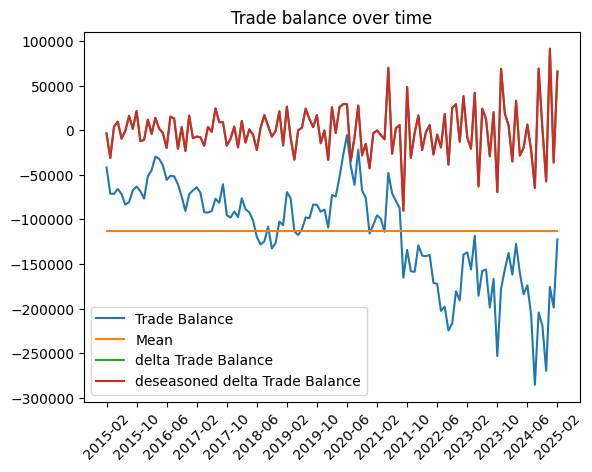

In [13]:
plt.figure()
plt.plot(months, regr_df['Trade_Balance'], label="Trade Balance")
plt.plot(months, [regr_df['Trade_Balance'].mean()]*months.size, label = "Mean")
plt.plot(months, trade_diff['d_Trade_Balance'], label='delta Trade Balance')
plt.plot(months, deseasoned_df['trade_diff'], label='deseasoned delta Trade Balance')
plt.title("Trade balance over time")
plt.xticks(
    ticks=range(0, len(months), 8),
    rotation=45  
)
plt.legend()
plt.show()

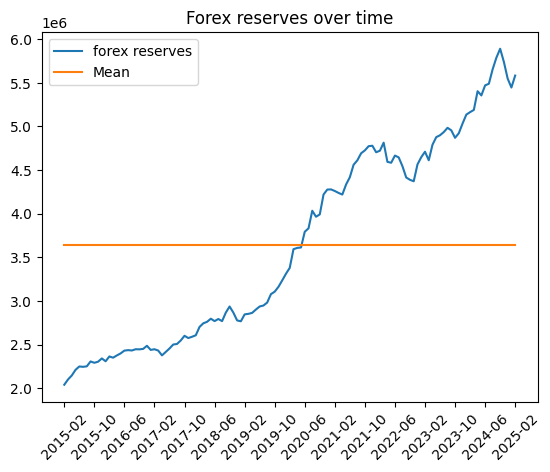

In [14]:
plt.figure()
plt.plot(months, model_data['FOREIGN EXCHANGE RESERVES'][1:], label="forex reserves")
plt.plot(months, [model_data['FOREIGN EXCHANGE RESERVES'].mean()]*months.size, label = "Mean")
plt.title("Forex reserves over time")
plt.xticks(
    ticks=range(0, len(months), 8),
    rotation=45  
)
plt.legend()
plt.show()

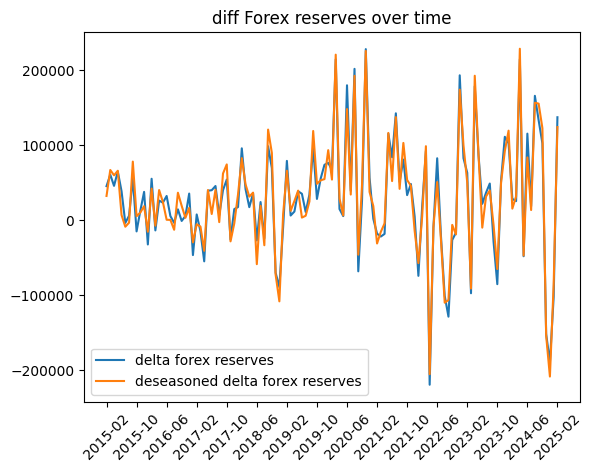

In [15]:
plt.figure()
plt.plot(months, regr_df['D_Forex_Reserves'], label="delta forex reserves")
plt.plot(months, deseasoned_df['fxres_diff'], label="deseasoned delta forex reserves")
plt.title("diff Forex reserves over time")
plt.xticks(
    ticks=range(0, len(months), 8),
    rotation=45  
)
plt.legend()
plt.show()

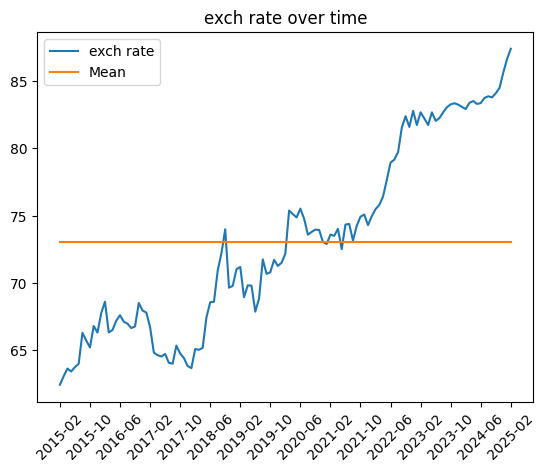

In [16]:
plt.figure()
plt.plot(months, model_data['RBI REFERENCE RATE: INR PER USD'][1:], label="exch rate")
plt.plot(months, [model_data['RBI REFERENCE RATE: INR PER USD'].mean()]*months.size, label = "Mean")
plt.title("exch rate over time")
plt.xticks(
    ticks=range(0, len(months), 8),
    rotation=45  
)
plt.legend()
plt.show()

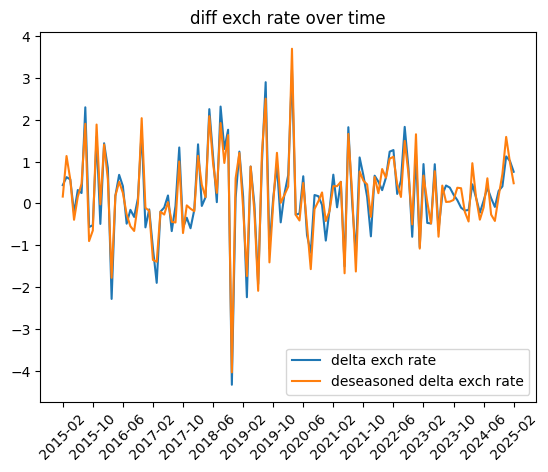

In [17]:
plt.figure()
plt.plot(months, regr_df['D_Exchange_Rate'], label="delta exch rate")
plt.plot(months, deseasoned_df['exrate_diff'], label = 'deseasoned delta exch rate')
plt.title("diff exch rate over time")
plt.legend()
plt.xticks(
    ticks=range(0, len(months), 8),
    rotation=45  
)
plt.show()

## ACF OF EXCH RATE

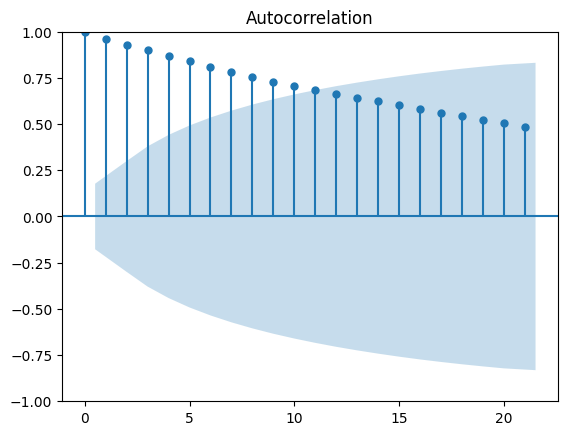

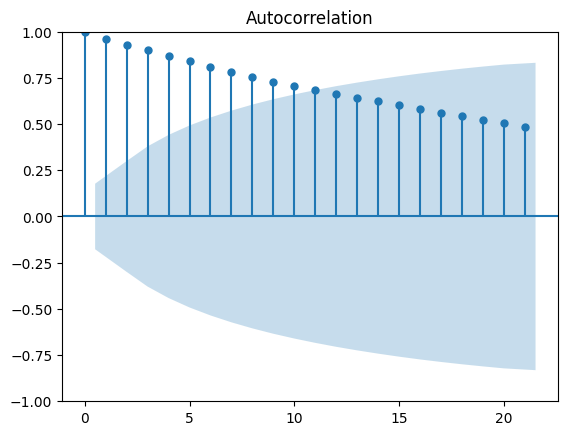

In [18]:
plot_acf(model_data['RBI REFERENCE RATE: INR PER USD'])

## ACF OF D_EXCH_RATE

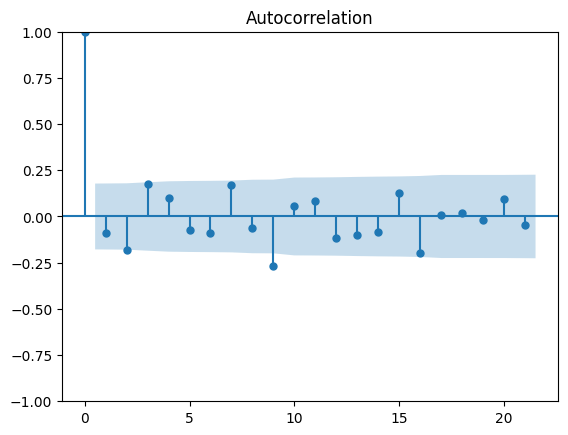

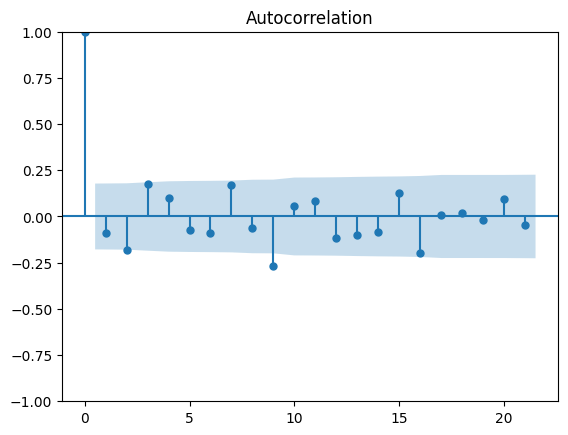

In [19]:
plot_acf(deseasoned_df['exrate_diff'])

## PACF OF EXCH RATE

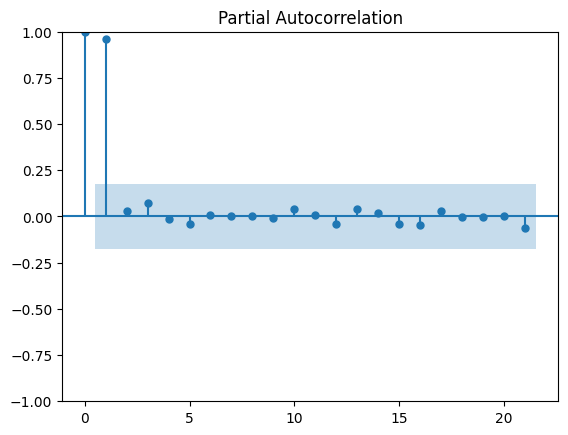

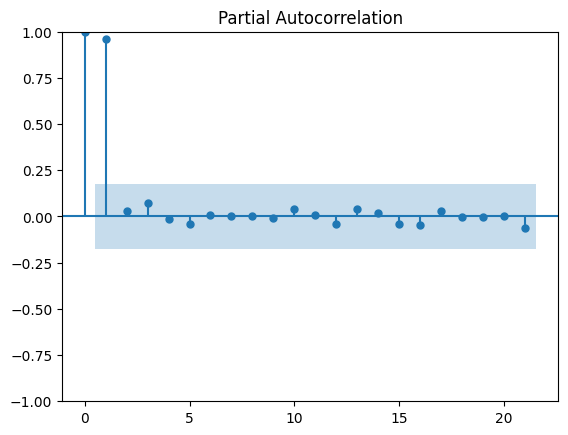

In [20]:
plot_pacf(model_data['RBI REFERENCE RATE: INR PER USD'])


## PACF OF D_EXCH_RATE

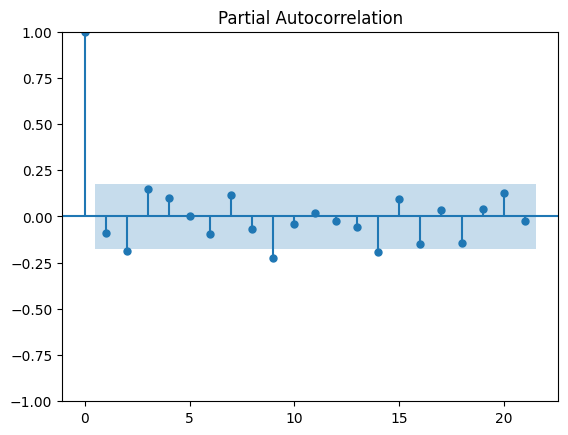

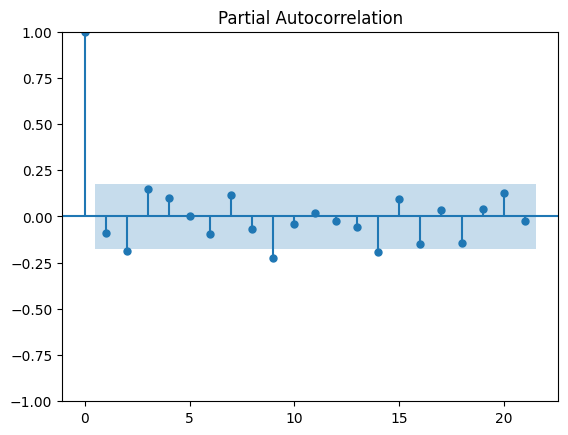

In [21]:
plot_pacf(deseasoned_df['exrate_diff'])

## ACF & PACF OF TRADE BAL

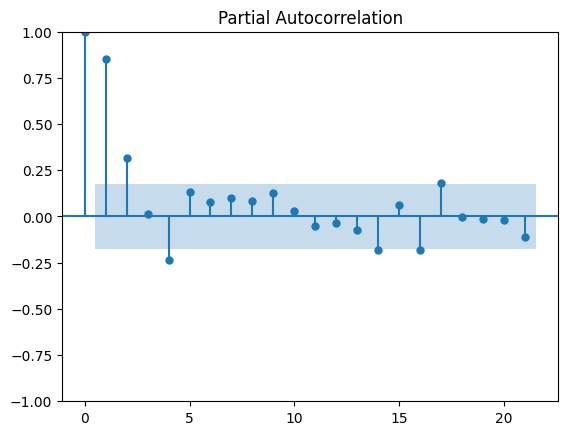

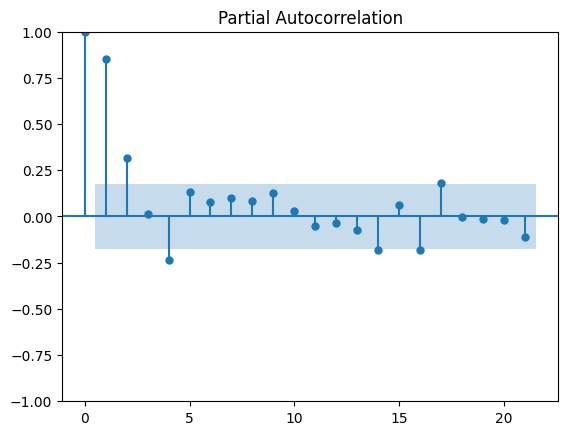

In [22]:
plot_pacf(regr_df['Trade_Balance'])

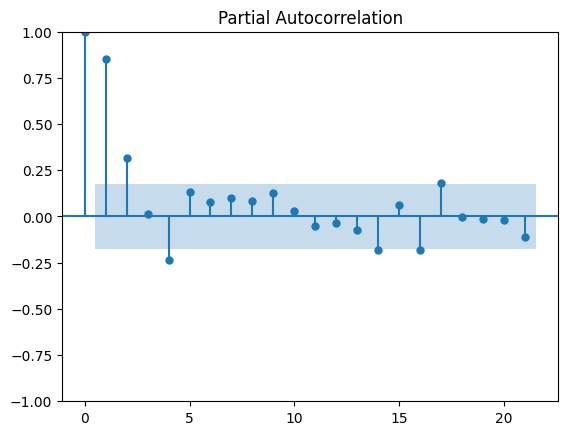

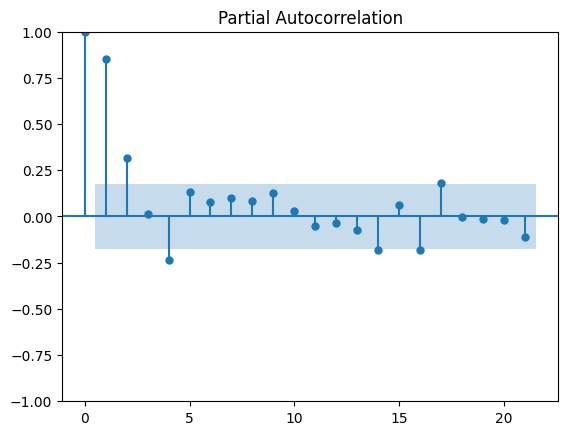

In [23]:
plot_pacf(regr_df['Trade_Balance'])

## ACF & PACF OF d_FOREX_RESERVES

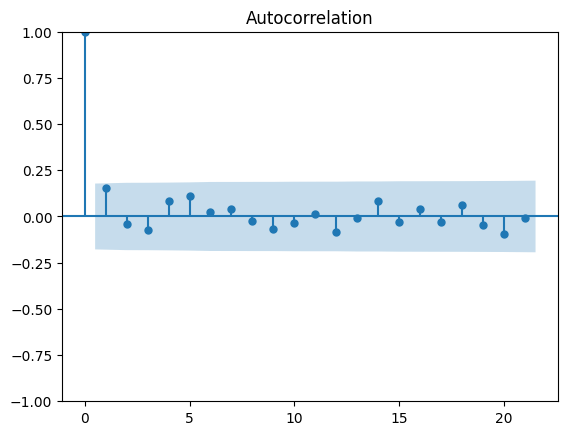

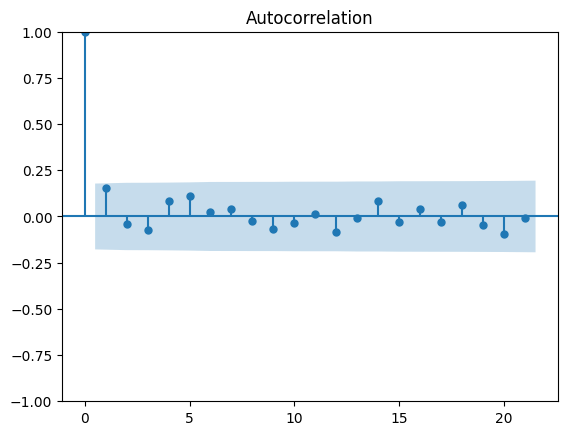

In [24]:
plot_acf(deseasoned_df['fxres_diff'])

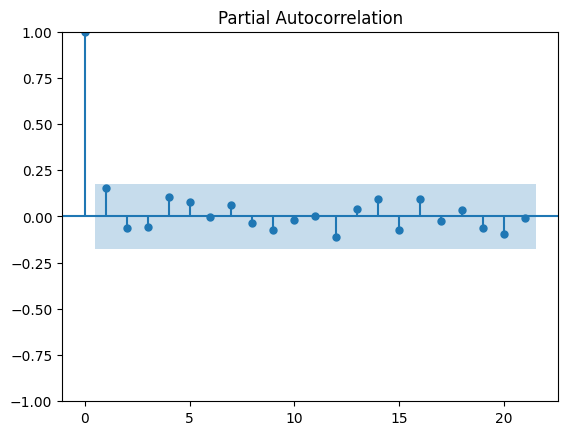

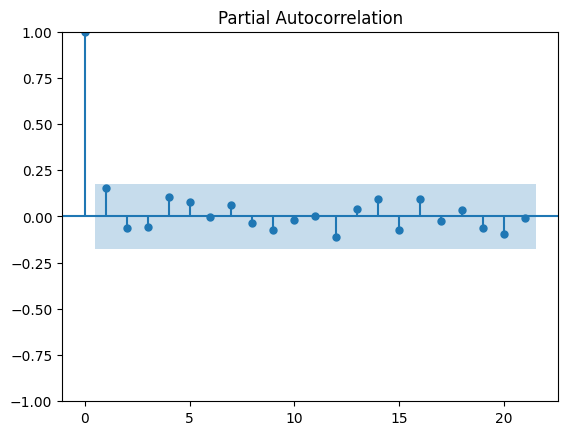

In [25]:
plot_pacf(deseasoned_df['fxres_diff'])

## acf & pacf of forex reserves

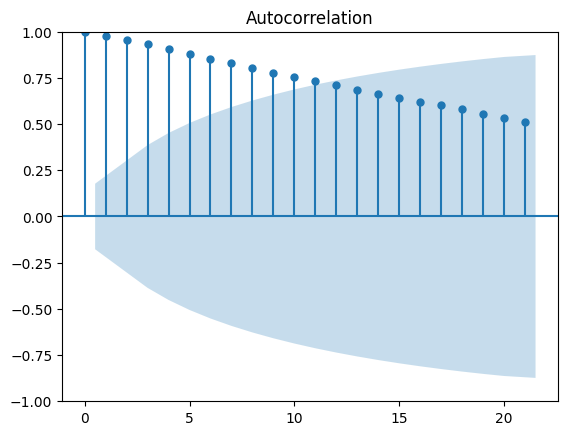

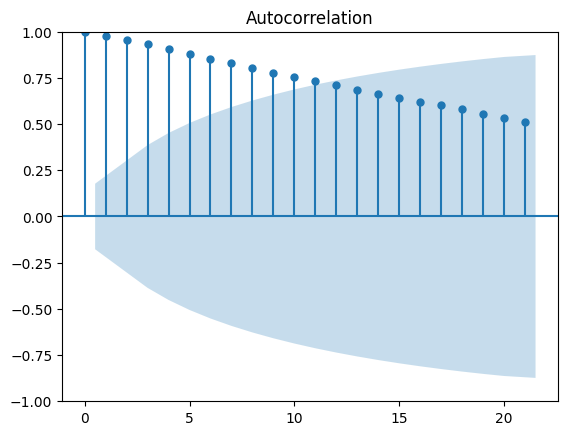

In [26]:
plot_acf(model_data['FOREIGN EXCHANGE RESERVES'])

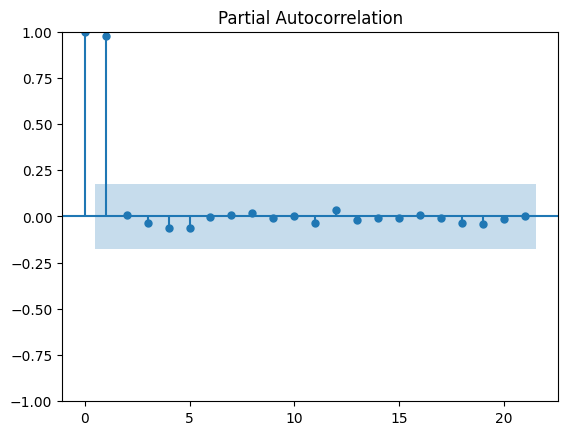

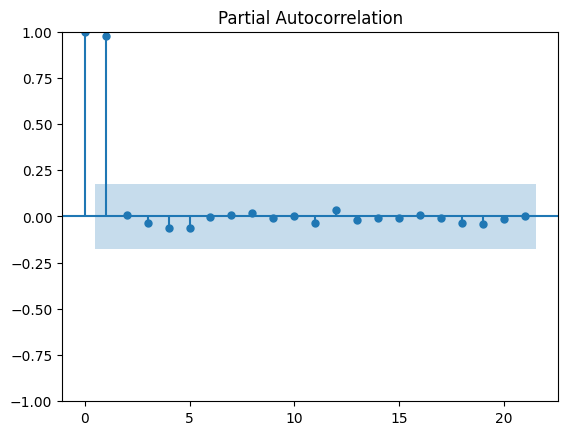

In [27]:
plot_pacf(model_data['FOREIGN EXCHANGE RESERVES'])

## acf & pacf of diff trade bal

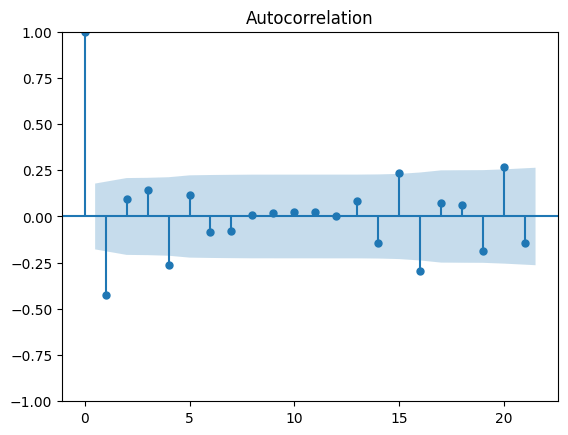

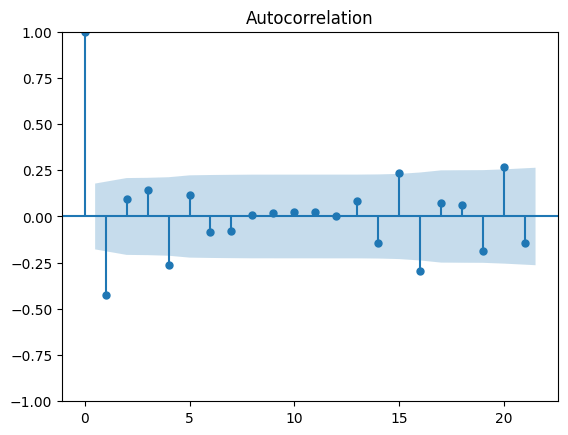

In [28]:
plot_acf(deseasoned_df['trade_diff'])

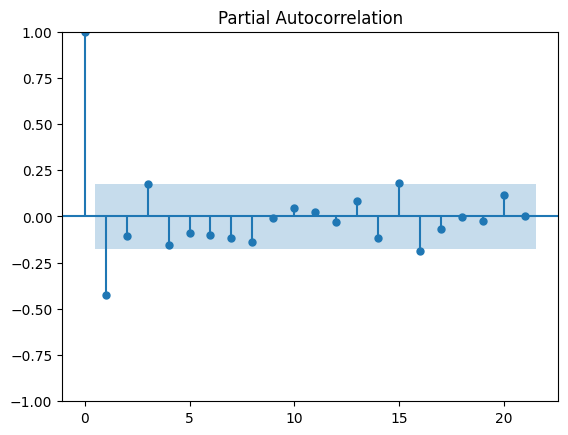

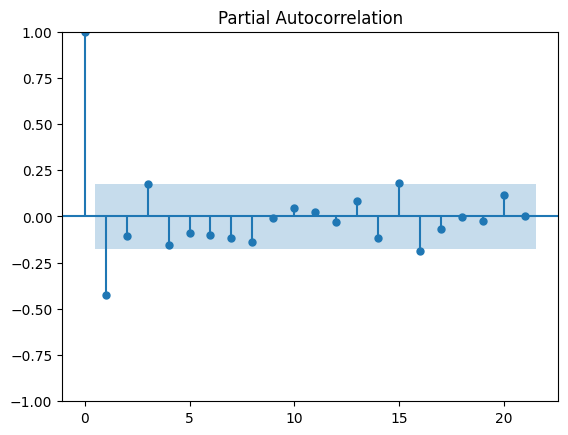

In [29]:
plot_pacf(deseasoned_df['trade_diff'])